lendo com pandas


In [13]:
import pandas as pd
import sqlite3   


conexao = sqlite3.connect('chinook.db.db')

tabela_clientes = pd.read_sql('select * from customers', conexao)

display(tabela_clientes)





,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


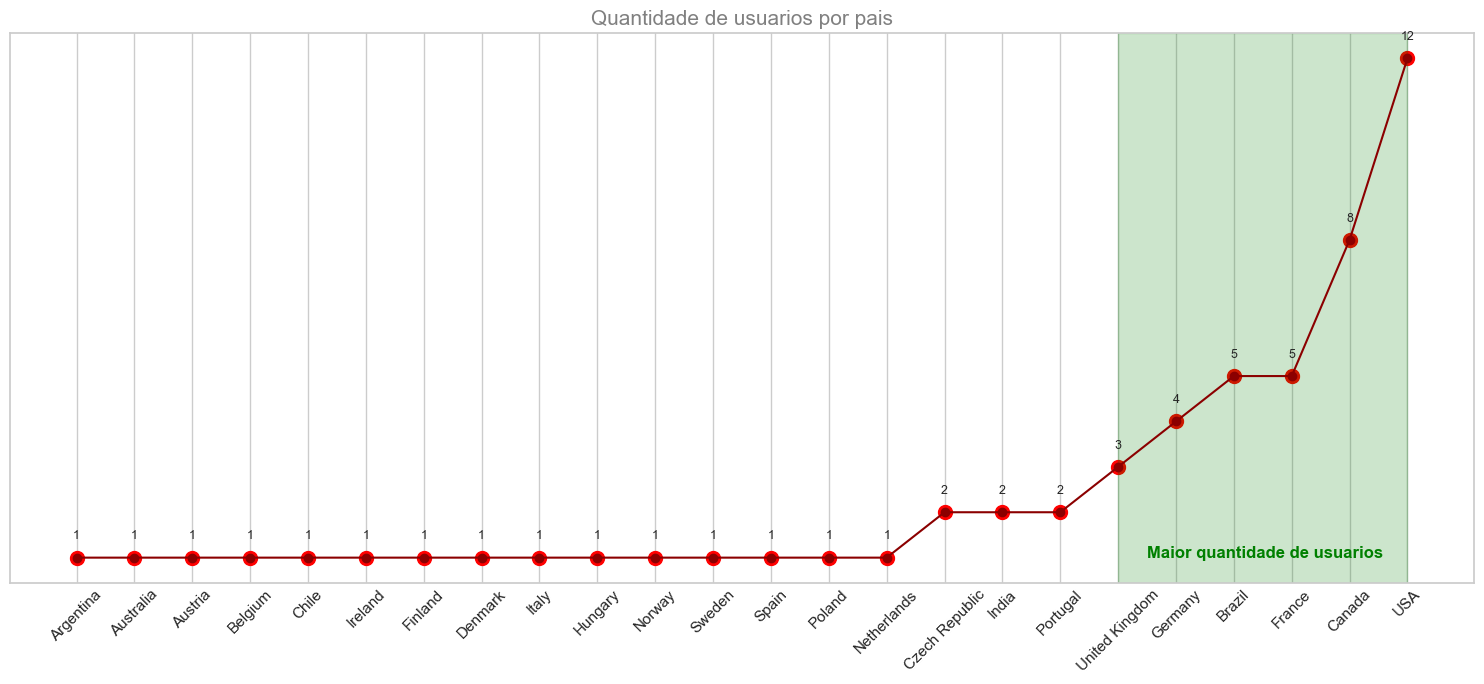

In [101]:
agrupamento = tabela_clientes.groupby('Country')['FirstName'].nunique().sort_values().reset_index()
agrupamento = agrupamento.set_index('Country')
agrupamento = agrupamento.rename(columns={'FirstName': 'Qtd. Clientes'})


import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(agrupamento.index, agrupamento.values, marker='o', color='darkred')
plt.scatter(agrupamento.index, agrupamento['Qtd. Clientes'], color='red', s=100)


plt.axvspan(18, 23, color='green', alpha=0.2)
plt.text(18.5, 1, 'Maior quantidade de usuarios', fontweight='bold', color='green')
plt.xticks(agrupamento.index ,rotation=45)

for i, valor in enumerate(agrupamento['Qtd. Clientes']):
    plt.text(i, valor + 0.4, str(valor), ha='center', fontsize=9)


plt.title('Quantidade de usuarios por pais', fontsize=15, color='gray')

plt.grid(True)

plt.yticks([])
plt.tick_params(axis='x', length=0)

plt.tight_layout()
plt.show()